### perceptron(ANN) : 뉴런이 1 layer
### MLP : 2~3 layer
### Deep Learning : 다수 Layer
#### sum(x1 * w1 , x2 * w2 , ... + b)
---
#### 머신러닝 : 입력 -> 특징추출 -> 분류 -> 출력   ,사람이 특징추출을 위한 알고리즘을 인간이 직접 제공
#### 딥러닝 : 입력 -> 블랙박스 -> 출력     , 학습하면서 특징을 추출함
---
#### 확률적경사하강법 : 한 번에 한 샘플씩 랜덤하게 골라서 훈련하여 파라미터를 갱신
#### 미니배치 : 적절한 크기의 배치 단위로 훈련하여 파라미터를 갱신
--- 

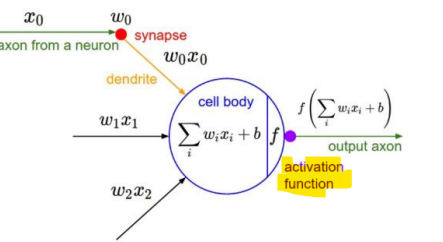
### 신경망에서는 계층별 입출력정보를 벡터가 아닌 텐서라 칭하고 여러 레이어의 흐름에 따라 학습한다고 하여 텐서플로우라 하고 차원을 랭크라 칭함
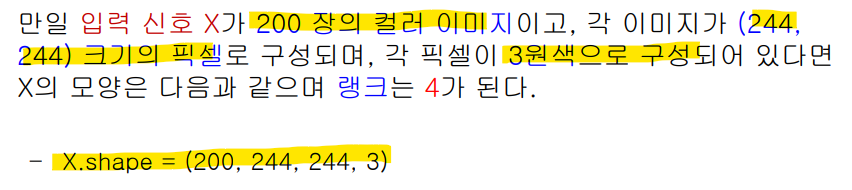

https://www.youtube.com/watch?v=kNPGXgzxoHw
#### 전 결합망(fully connected network, FCN) : 각 계층의 모든 출력이 다음 단계의 모든 입력으로 연결되는 선이 존재하고 여기에 가중치가 곱해지는 구조

### 활성화함수 : 뉴런이 다른 뉴런에게 전달되는 신호의 양을 결정짓는 방법,다음 계층으로 신호를 전달할 때, 어떤 범위의 신호를 “활성화(activate)” 하여 전달할지를 정하는 함수

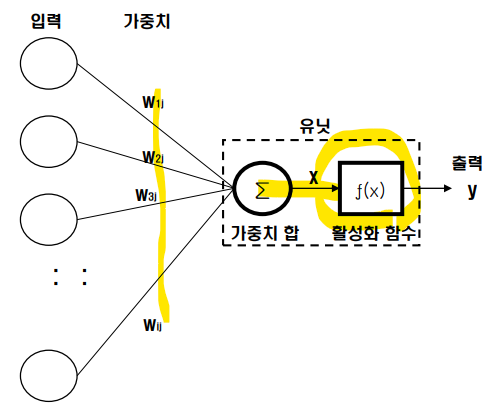
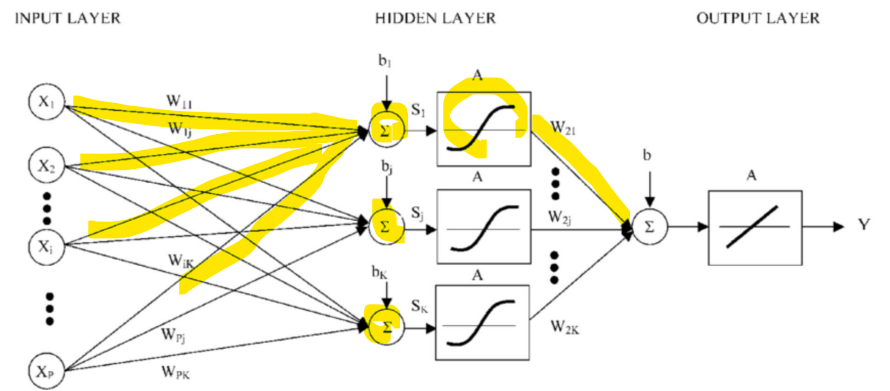
#### - 활성화함수 종류
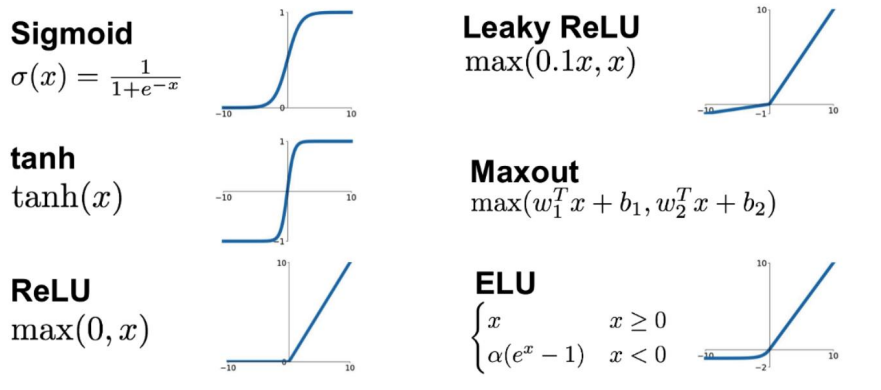
#### - 계층마다 활성화함수를 선택할수 있다
#### - 분류나 회귀 : 0~1범위의 확률값을 예측할때 시그모이드 사용
#### - 다중분류 : 소프트맥스 사용
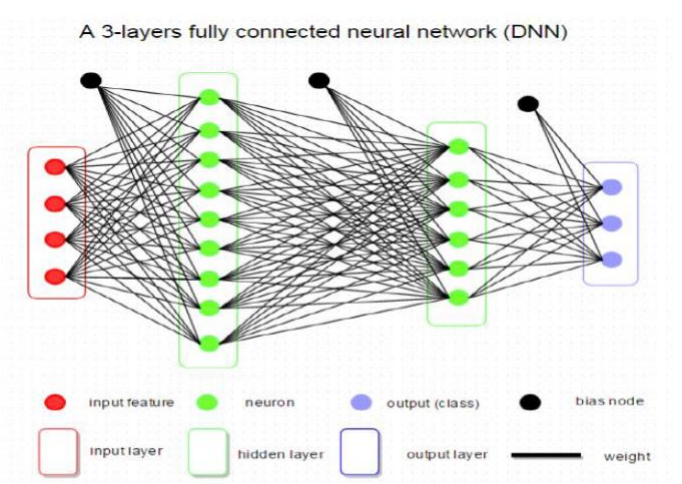
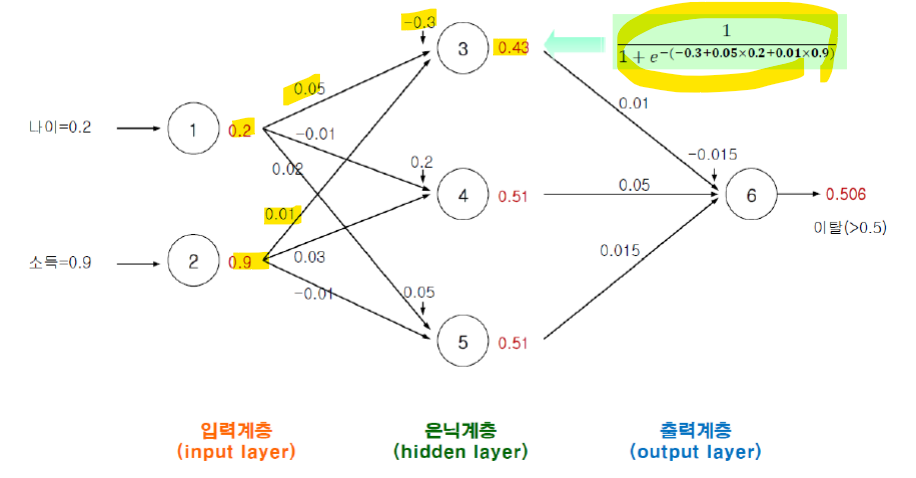
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.00428&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical

In [5]:
dir(mnist.load_data())

11490434/11490434 [==============================] - 1s 0us/step


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
type(train_images)

numpy.ndarray

In [11]:
type(train_labels)

numpy.ndarray

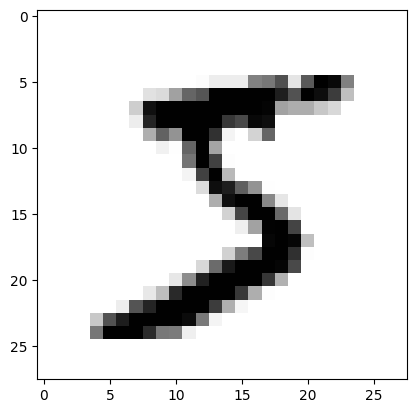

In [14]:
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()

In [15]:
28*28

784

## - MLP디자인 -
### 입력층 독립변수 : 784개
### 출력층 종속변수 : 10개 (0 ~ 9) -> one hot encoding처리(1인 경우 : 0,1,0,0,0,0,0,0,0,0)
### 은닉층 갯수
### 활성화함수
### 연결 : 전 결합망(full connect network)
### 독립변수 : 0~1사이로 정규화
---

### 독립변수 크기변환 및 정규화 

In [18]:
# 입력을 1차원으로 변경(MLP)
train_images = train_images.reshape((60000, 784))
train_images.shape
# test_images = test_images.reshape((60000, 784))

(60000, 784)

In [19]:
# 독립변수 0~1사이의 값으로 정규화
train_images = train_images.astype('float32') / 255

In [20]:
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

In [22]:
test_images.max(),test_images.min()

(1.0, 0.0)

### 출력값 인코딩

In [24]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
test_labels[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
test_labels.shape

(10000, 10)

### 딥러닝 모델 설계 
#### layers.Dense : 전 결합망(FCN)을 하겠다는 의미

In [27]:
from keras import layers, models

In [28]:
model = models.Sequential()
model.add(layers.Dense(100, activation = 'relu', input_shape = (784,))) # 1번 hidden layer : 100뉴런수 활성화 relu, 입력값 784개
model.add(layers.Dense(100, activation = 'relu')) # 2번 hidden layer : 100뉴런수 활성화 relu
model.add(layers.Dense(10, activation = 'softmax')) # 출력층 : 10 출력값 활성화

In [29]:
# 78500 : 784 * 100개 뉴런 + 100개 bias
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop', # 경사하강법
              loss = 'categorical_crossentropy',  # 손실함수
              metrics = ['accuracy'] ) # 성능평가

### 모델학습 

In [31]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)  # epochs 전체학습 수, batch_size 학습성능갱신 샘플수 

Epoch 1/3
938/938 [==============================] - 5s 4ms/step - loss: 0.2829 - accuracy: 0.9175
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1201 - accuracy: 0.9636
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0853 - accuracy: 0.9735


### 학습평가 

In [33]:
test_loass, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9715


In [34]:
test_acc

0.9714999794960022